In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [2]:
from pycaret.datasets import get_data

In [3]:
import pandas as pd
litcovid_dataset = pd.read_csv('/content/drive/MyDrive/Biocreative/Biocreative/litcovid_dataset.csv')

In [4]:
print(litcovid_dataset.columns)

Index(['pmid', 'journal', 'title', 'abstract', 'keywords', 'pub_type',
       'authors', 'doi', 'label', 'Case Report', 'Diagnosis',
       'Epidemic Forecasting', 'Mechanism', 'Prevention', 'Transmission',
       'Treatment'],
      dtype='object')


In [6]:
Df = litcovid_dataset.drop(['pmid', 'journal', 'title', 'keywords', 'pub_type', 'authors', 'doi', 'Case Report', 'Diagnosis', 'Epidemic Forecasting', 'Mechanism', 'Prevention', 'Transmission', 'Treatment'], axis=1)
Df.head()

,abstract,label
0,"In December 2019, a new and highly contagious ...",Treatment;Mechanism
1,"A novel coronavirus disease (COVID-19), transm...",Treatment;Prevention
2,"BACKGROUND: In December 2019, the novel corona...",Case Report
3,During the coronavirus disease 2019 (COVID-19)...,Prevention
4,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,Treatment


In [7]:
from pycaret.nlp import *
exp_name = setup(data=Df, target='abstract')

Description,Value
session_id,596
Documents,24960
Vocab Size,33480
Custom Stopwords,False


In [8]:
lda = create_model('lda')

In [9]:
lda_df = assign_model(lda)

In [10]:
lda_df

,abstract,label,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,new highly_contagious infectious disease ident...,Treatment;Mechanism,0.049767,0.009894,0.932344,0.007994,Topic 2,0.93
1,novel transmit human human rapidly become pand...,Treatment;Prevention,0.044270,0.233371,0.658606,0.063753,Topic 2,0.66
2,novel first report central spread rapidly comm...,Case Report,0.571309,0.081823,0.236983,0.109885,Topic 0,0.57
3,important risk infection health care worker in...,Prevention,0.380467,0.493138,0.002509,0.123886,Topic 1,0.49
4,objective direct highly effective hepatitis vi...,Treatment,0.791851,0.020213,0.131823,0.056114,Topic 0,0.79
...,...,...,...,...,...,...,...,...
24955,early world face global emergency call covid m...,Prevention,0.054471,0.872539,0.006045,0.066945,Topic 1,0.87
24956,purpose plays_key role management covid patien...,Diagnosis,0.626767,0.045957,0.047334,0.279942,Topic 0,0.63
24957,several study suggest various imbalance seem i...,Treatment;Diagnosis,0.794973,0.005337,0.115796,0.083894,Topic 0,0.79
24958,global virus early month rapid expose vulnerab...,Prevention,0.314176,0.588424,0.025791,0.071609,Topic 1,0.59


In [36]:
import numpy as np

def extract_articles(lda_df, topic):
  text = []
  for idx, article in enumerate(lda_df.abstract):
    _topic = lda_df.iloc[idx, -2:-1].values.item()
    if _topic == topic:
      text.append(article)

  return np.array(text)

In [46]:
topic = 'Topic 0'
text1 = extract_articles(lda_df, topic)

In [47]:
topic = 'Topic 1'
text2 = extract_articles(lda_df, topic)

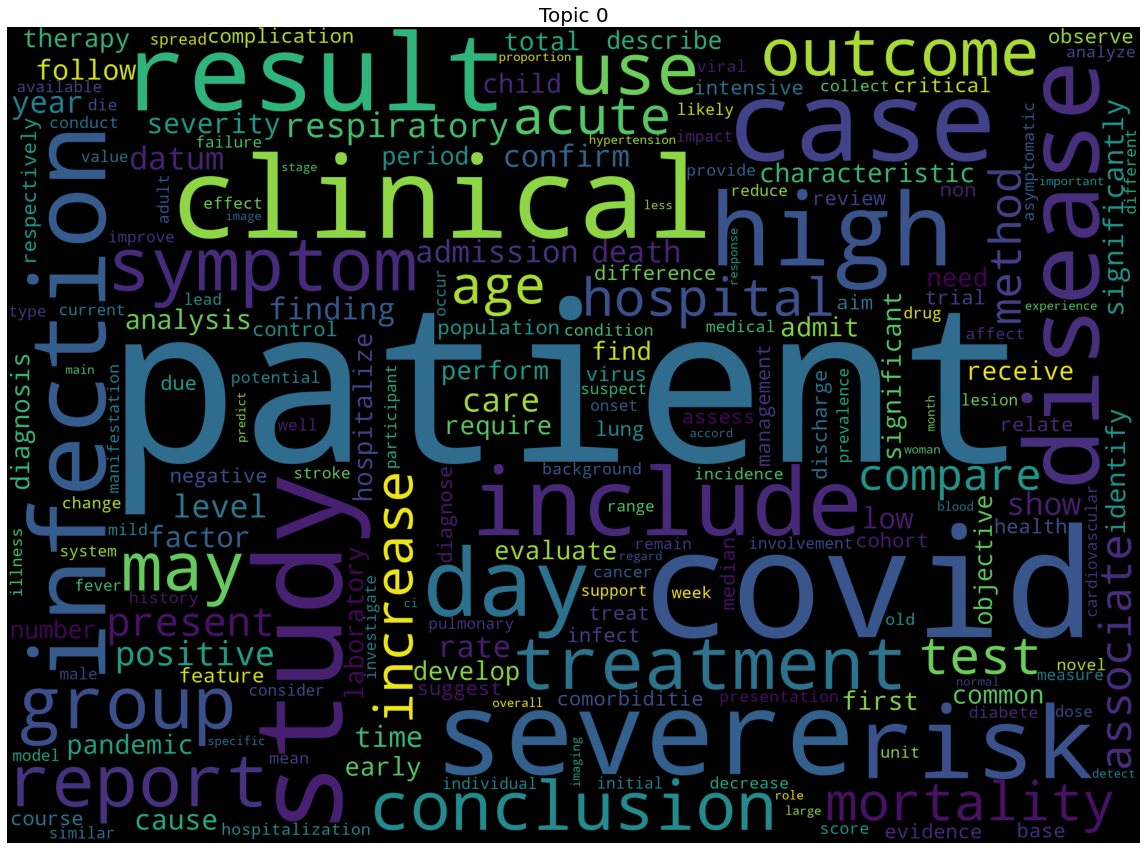

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 0'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title(topic,fontsize=20)
plt.imshow(cloud_toxic)

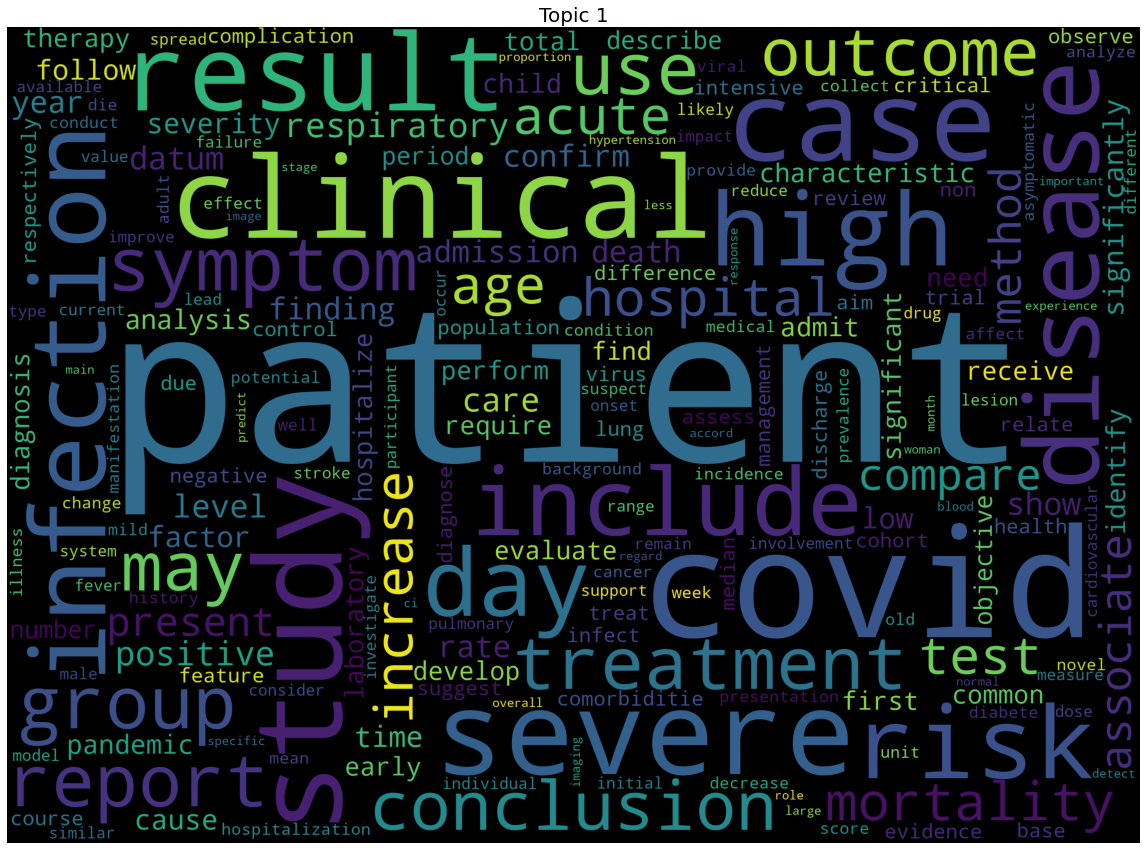

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 1'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title(topic,fontsize=20)
plt.imshow(cloud_toxic)

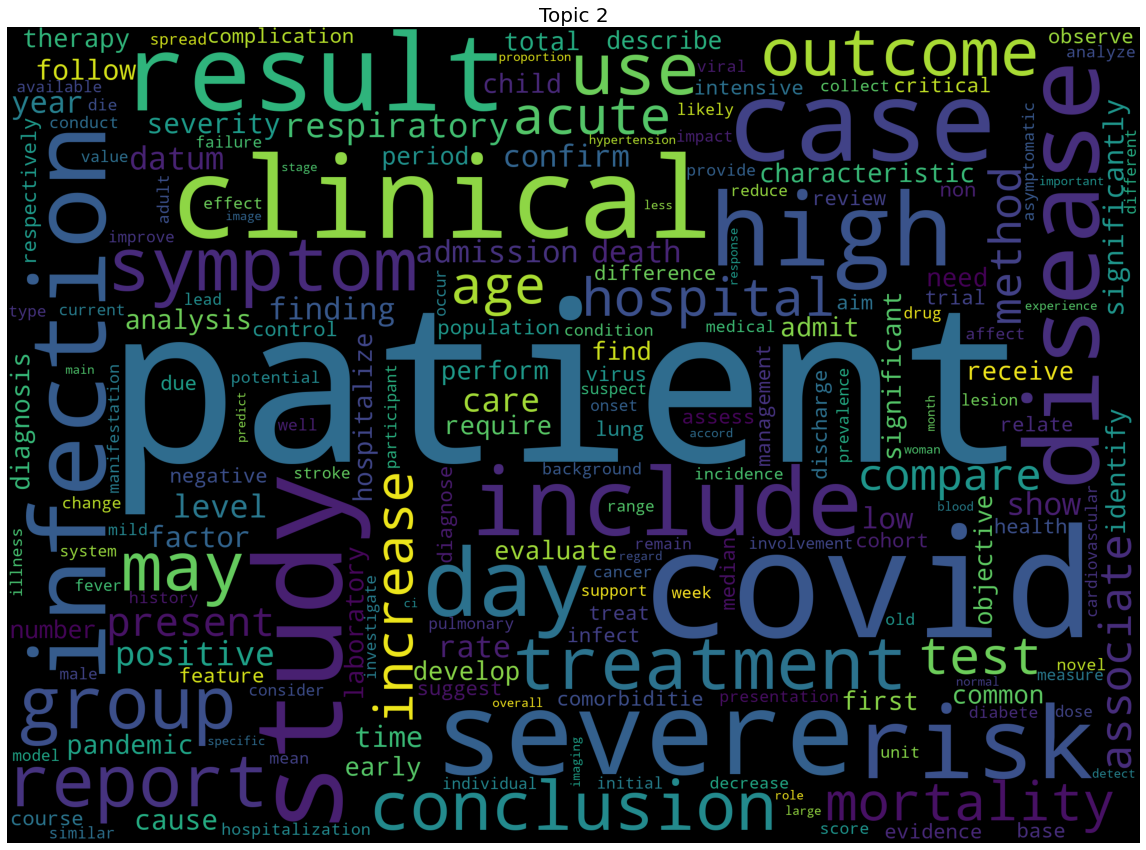

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 2'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title(topic,fontsize=20)
plt.imshow(cloud_toxic)

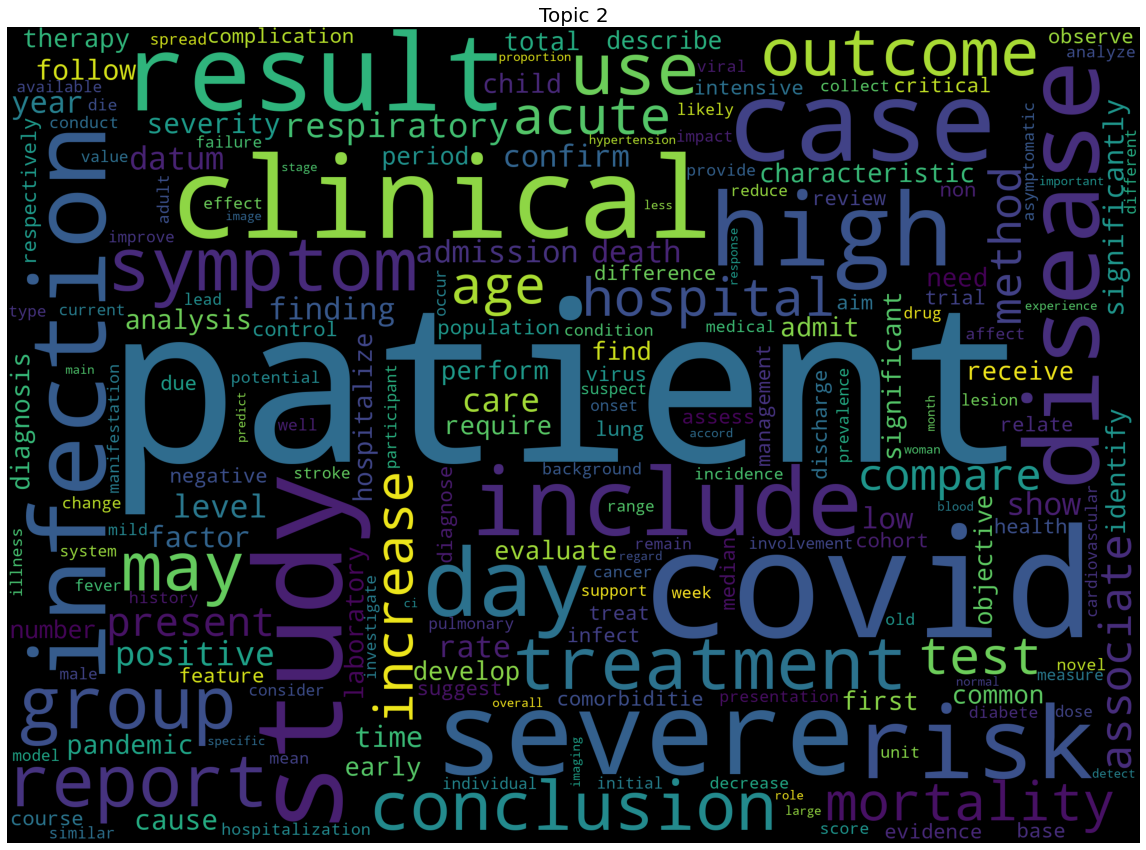

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 2'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')

plt.title(topic,fontsize=20)
plt.imshow(cloud_toxic)